In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


The Dataframe QVI_transaction_data contains all transactiona details of customers buying chips.
I will attempt to do the following
1. Determine sales per day, week, month, and quarter
2. Determine top highest selling stores
3. Determine the highest selling Product in quantity and sales
Combined with the QVI_Purchase behaviour data frame, I will then do the following
4. Calculate RFM by Lifestage and premium customer


In [27]:
retail_df = pd.read_csv(r"E:\My Python codes\QVI_transaction_data.csv")
retail_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,3/9/2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,8/13/2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,11/6/2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,12/27/2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [28]:
retail_df.info()
#No Null values but the date column is in string format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [29]:
retail_df.drop_duplicates(keep=False,inplace=True) 

In [30]:
#Convert Date column to datetime format
retail_df.loc[:,'DATE'] = pd.to_datetime(retail_df.loc[:,'DATE'], format= '%m/%d/%Y')

retail_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [31]:
#Let's check if there's anything other than chips
retail_df['PROD_NAME'].unique()
#Looks like the list also includes salsa sauces. From the Summary below we can see that salsa dips are 300g in weight. 
#We'll filter and remove these

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [32]:
retail_df1 = retail_df.loc[~(retail_df['PROD_NAME']).str.contains('300g') == True].sort_values('DATE')
retail_df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...
111308,2019-06-30,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


I want to do a trend analysis of sales for the two years, over different intervals (Sales per day, Sales per week, sales per month, and sales per quarter

In [33]:
#Include another column for quarterly period
retail_df1['QTR']=pd.PeriodIndex(retail_df1['DATE'], freq='Q')
retail_df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,QTR
256685,2018-07-01,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4,2018Q3
235990,2018-07-01,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018Q3
34341,2018-07-01,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2018Q3
62583,2018-07-01,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0,2018Q3
116435,2018-07-01,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2018Q3
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,2019Q2
31603,2019-06-30,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2,2019Q2
245890,2019-06-30,95,95300,95463,23,Cheezels Cheese 330g,2,11.4,2019Q2
245590,2019-06-30,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6,2019Q2


In [34]:
retail_df1['QTR'].unique()

<PeriodArray>
['2018Q3', '2018Q4', '2019Q1', '2019Q2']
Length: 4, dtype: period[Q-DEC]

In [35]:
retail_df1 = retail_df1[['DATE','QTR','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES']]
retail_df1

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


In [36]:
#general statistics
retail_df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249668.000000,2.496680e+05,2.496680e+05,249668.000000,249668.000000,249668.000000
mean,135.044503,1.355205e+05,1.351236e+05,56.294379,1.907762,7.293976
std,76.773857,8.065774e+04,7.813183e+04,33.528877,0.657129,3.071806
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001600e+04,6.757375e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303600e+05,1.351485e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030800e+05,2.026342e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
#Looks like there's a customer who made a purchase of 200 bags, way above the average.

In [37]:
retail_df1.loc[(retail_df1['PROD_QTY']==200)]

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,2018Q3,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,2019Q2,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [38]:
#Let's find out if this customer has made any other puchases except from the two
retail_df1.loc[(retail_df1['LYLTY_CARD_NBR']==226000)]
#We're better off removing this customer as their records are outliers

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,2018Q3,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,2019Q2,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [50]:
retail_df2 = retail_df1.drop([retail_df1.index[69762], retail_df1.index[69763]])
retail_df2

,DATE,QTR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
256685,2018-07-01,2018Q3,245,245339,247845,7,Smiths Crinkle Original 330g,2,11.4
235990,2018-07-01,2018Q3,222,222040,221737,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
34341,2018-07-01,2018Q3,25,25040,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
62583,2018-07-01,2018Q3,128,128215,132006,29,French Fries Potato Chips 175g,2,6.0
116435,2018-07-01,2018Q3,256,256330,255496,52,Grain Waves Sour Cream&Chives 210G,1,3.6
...,...,...,...,...,...,...,...,...,...
111308,2019-06-30,2019Q2,172,172209,174057,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
31603,2019-06-30,2019Q2,199,199320,198993,24,Grain Waves Sweet Chilli 210g,2,7.2
245890,2019-06-30,2019Q2,95,95300,95463,23,Cheezels Cheese 330g,2,11.4
245590,2019-06-30,2019Q2,91,91076,89519,40,Thins Chips Seasonedchicken 175g,2,6.6


array(['2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-05T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-08T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-12T00:00:00.000000000',
       '2018-07-13T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-17T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-07-22T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-24T00:00:00.000000000',
       '2018-07-25T00:00:00.000000000', '2018-07-26T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-07-28

Text(0.5, 1.0, 'Sales per day')

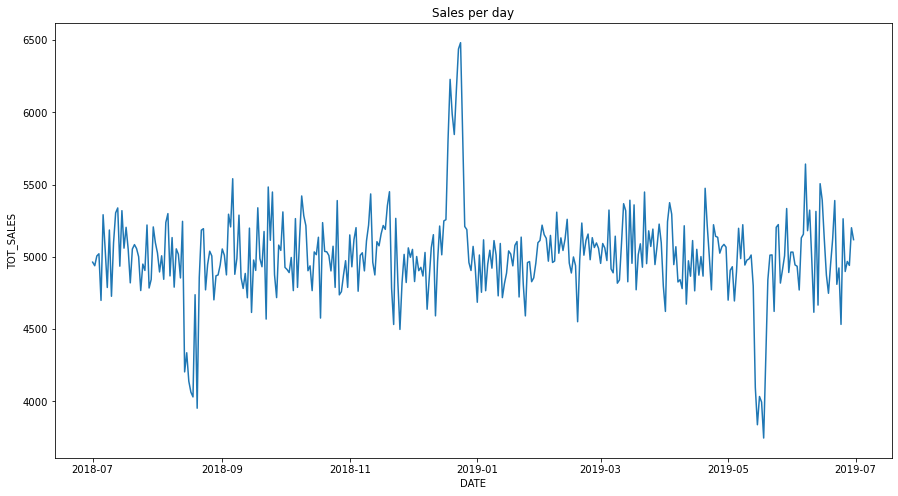

In [57]:
#Sales per day
plt.figure(figsize=(15,8))
sales_per_purchase_date = retail_df2.groupby('DATE', as_index=False).TOT_SALES.sum()
ax = sns.lineplot(x="DATE", y="TOT_SALES", data=sales_per_purchase_date)
ax.set_title('Sales per day')

Text(0.5, 1.0, 'Sales per month')

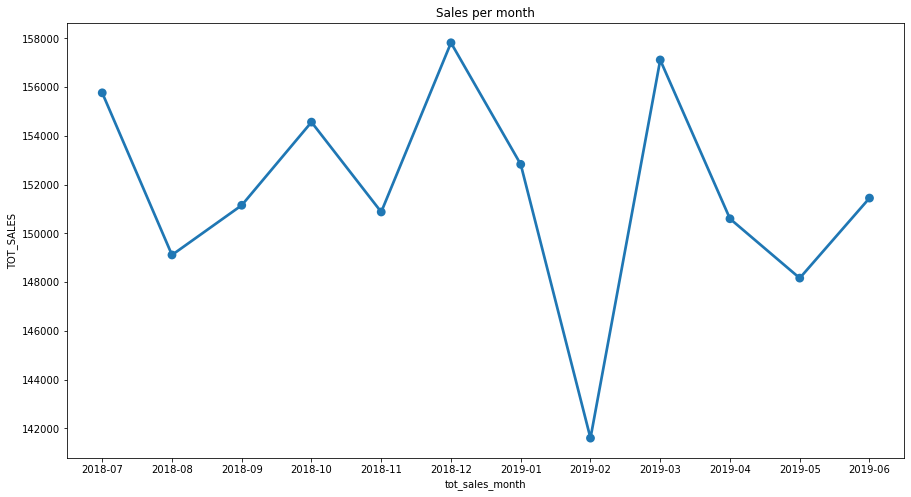

In [72]:
#sales per week
retail_df2['tot_sales_month'] = retail_df2.DATE.dt.to_period('M').astype(str)

# creating an aggregation
plt.figure(figsize=(15,8))
sales_per_purchase_month = retail_df2.groupby('tot_sales_month', as_index=False).TOT_SALES.sum()
ax = sns.pointplot(x="tot_sales_month", y="TOT_SALES", data=sales_per_purchase_month)
ax.set_title('Sales per month')

Text(0.5, 1.0, 'Sales per qtr')

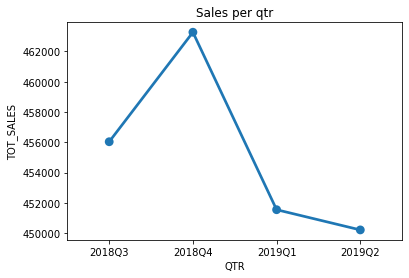

In [71]:
#sales per quater
sales_per_purchase_qtr = retail_df2.groupby('QTR', as_index=False).TOT_SALES.sum()
ax = sns.pointplot(x="QTR", y="TOT_SALES", data=sales_per_purchase_qtr)
ax.set_title('Sales per qtr')

In [98]:
#Lets's sort the dataframe by sales in each store
sales_per_store = retail_df2.groupby('STORE_NBR', as_index=False).TOT_SALES.sum()
sales_per_store = sales_per_store.sort_values(by ='TOT_SALES',ascending=False)
sales_per_store

,STORE_NBR,TOT_SALES
224,226,17844.65
87,88,15445.85
164,165,15188.35
235,237,14830.60
39,40,14427.30
...,...,...
91,92,9.20
205,206,7.60
250,252,7.40
10,11,6.70


<Figure size 720x576 with 0 Axes>

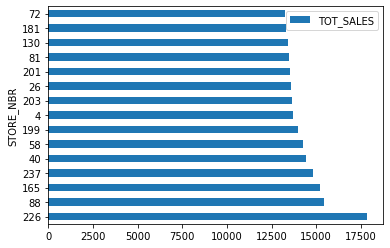

In [99]:
#Top 15 best selling stores
plt.figure(figsize=(10,8))
ax = sales_per_store.iloc[:15].plot.barh(x='STORE_NBR', y='TOT_SALES')



#Project ongoing...